In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from numba import jit
import os 
import glob 
import tensorflow as tf 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
amsterdam_weekdays = pd.read_csv('amsterdam_weekdays.csv', index_col=0, encoding='latin1')
amsterdam_weekends = pd.read_csv('amsterdam_weekends.csv', index_col=0, encoding='latin1')
athens_weekdays = pd.read_csv('athens_weekdays.csv', index_col=0, encoding='latin1')
athens_weekends = pd.read_csv('athens_weekends.csv', index_col=0, encoding='latin1')
barcelona_weekdays = pd.read_csv('barcelona_weekdays.csv', index_col=0, encoding='latin1')
barcelona_weekends = pd.read_csv('barcelona_weekends.csv', index_col=0, encoding='latin1')
berlin_weekdays = pd.read_csv('berlin_weekdays.csv', index_col=0, encoding='latin1')
berlin_weekends = pd.read_csv('berlin_weekends.csv', index_col=0, encoding='latin1')
budapest_weekdays = pd.read_csv('budapest_weekdays.csv', index_col=0, encoding='latin1')
budapest_weekends = pd.read_csv('budapest_weekends.csv', index_col=0, encoding='latin1')
lisbon_weekdays = pd.read_csv('lisbon_weekdays.csv', index_col=0, encoding='latin1')
lisbon_weekends = pd.read_csv('lisbon_weekends.csv', index_col=0, encoding='latin1')
london_weekdays = pd.read_csv('london_weekdays.csv', index_col=0, encoding='latin1')
london_weekends = pd.read_csv('london_weekends.csv', index_col=0, encoding='latin1')
paris_weekdays = pd.read_csv('paris_weekdays.csv', index_col=0, encoding='latin1')
paris_weekends = pd.read_csv('paris_weekends.csv', index_col=0, encoding='latin1')
rome_weekdays = pd.read_csv('rome_weekdays.csv', index_col=0, encoding='latin1')
rome_weekends = pd.read_csv('rome_weekends.csv', index_col=0, encoding='latin1')
vienna_weekdays = pd.read_csv('vienna_weekdays.csv', index_col=0, encoding='latin1')
vienna_weekends = pd.read_csv('vienna_weekends.csv', index_col=0, encoding='latin1')

In [3]:
dataframes = [amsterdam_weekdays,amsterdam_weekends,athens_weekdays,athens_weekends,barcelona_weekdays,barcelona_weekends,berlin_weekdays,berlin_weekends,
              budapest_weekdays,budapest_weekends,lisbon_weekdays,lisbon_weekends,london_weekdays,london_weekends,paris_weekdays,paris_weekends,rome_weekdays,
              rome_weekends,vienna_weekdays,vienna_weekends]

In [5]:
if all([set(dataframes[0].columns) == set(df.columns) for df in dataframes]):
    print('All dataframes have the same columns')
else:
    print('Some dataframes have different columns')

All dataframes have the same columns


In [6]:
# dataframes = [amsterdam_weekdays,amsterdam_weekends,athens_weekdays,athens_weekends,barcelona_weekdays,barcelona_weekends,berlin_weekdays,berlin_weekends,
#               budapest_weekdays,budapest_weekends,lisbon_weekdays,lisbon_weekends,london_weekdays,london_weekends,paris_weekdays,paris_weekends,rome_weekdays,
#               rome_weekends,vienna_weekdays,vienna_weekends]

def produce_missing_report(df):
    percent_missing = df.isna().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
    return missing_value_df

for dataframe in dataframes:
    print(produce_missing_report(dataframe))
    print('\n')

                            percent_missing
realSum                                 0.0
room_type                               0.0
room_shared                             0.0
room_private                            0.0
person_capacity                         0.0
host_is_superhost                       0.0
multi                                   0.0
biz                                     0.0
cleanliness_rating                      0.0
guest_satisfaction_overall              0.0
bedrooms                                0.0
dist                                    0.0
metro_dist                              0.0
attr_index                              0.0
attr_index_norm                         0.0
rest_index                              0.0
rest_index_norm                         0.0
lng                                     0.0
lat                                     0.0


                            percent_missing
realSum                                 0.0
room_type                     

In [7]:
# dataframes = [amsterdam_weekdays,amsterdam_weekends,athens_weekdays,athens_weekends,barcelona_weekdays,barcelona_weekends,berlin_weekdays,berlin_weekends,
#               budapest_weekdays,budapest_weekends,lisbon_weekdays,lisbon_weekends,london_weekdays,london_weekends,paris_weekdays,paris_weekends,rome_weekdays,
#               rome_weekends,vienna_weekdays,vienna_weekends]

print('Number of rows in each dataframe: ')
for df in dataframes:
    print(len(df.index)) 

Number of rows in each dataframe: 
1103
977
2653
2627
1555
1278
1284
1200
2074
1948
2857
2906
4614
5379
3130
3558
4492
4535
1738
1799


In [8]:
if all(set(dataframes[0].dtypes)):
    print('The dataframes all have the same datatypes')
else:
    print('Some of the dataframes have different datatypes')

The dataframes all have the same datatypes


In [9]:
#since all the dataframes have the same columns and same datatypes, just printing them for one .csv file should give us the information we want, for all
#the .csv files.
london_weekdays.dtypes

realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

In [10]:
csv_files=glob.glob('*.{}'.format('csv'))
csv_files

['amsterdam_weekdays.csv',
 'amsterdam_weekends.csv',
 'athens_weekdays.csv',
 'athens_weekends.csv',
 'barcelona_weekdays.csv',
 'barcelona_weekends.csv',
 'berlin_weekdays.csv',
 'berlin_weekends.csv',
 'budapest_weekdays.csv',
 'budapest_weekends.csv',
 'CleanedData.csv',
 'lisbon_weekdays.csv',
 'lisbon_weekends.csv',
 'london_weekdays.csv',
 'london_weekends.csv',
 'paris_weekdays.csv',
 'paris_weekends.csv',
 'rome_weekdays.csv',
 'rome_weekends.csv',
 'vienna_weekdays.csv',
 'vienna_weekends.csv']

In [11]:
df_append=pd.DataFrame()
for file in csv_files:
    df_temp=pd.read_csv(file)
    df_append=df_append.append(df_temp, ignore_index=True)
df_append

C:\Users\Canaan Presbyterian\AppData\Local\Temp\ipykernel_6956\2751399899.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append=df_append.append(df_temp, ignore_index=True)
C:\Users\Canaan Presbyterian\AppData\Local\Temp\ipykernel_6956\2751399899.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append=df_append.append(df_temp, ignore_index=True)
C:\Users\Canaan Presbyterian\AppData\Local\Temp\ipykernel_6956\2751399899.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append=df_append.append(df_temp, ignore_index=True)
C:\Users\Canaan Presbyterian\AppData\Local\Temp\ipykernel_6956\2751399899.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,Unnamed: 0.10,Unnamed: 0.9,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1
0,0,194.033698,Private room,False,True,2.0,False,1.0,0.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,344.245776,Private room,False,True,4.0,False,0.0,0.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,264.101422,Private room,False,True,2.0,False,0.0,1.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,433.529398,Private room,False,True,4.0,False,0.0,1.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,485.552926,Private room,False,True,2.0,True,0.0,0.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620479,1794,715.938574,Entire home/apt,False,False,6.0,False,0.0,1.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620480,1795,304.793960,Entire home/apt,False,False,2.0,False,0.0,0.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620481,1796,637.168969,Entire home/apt,False,False,2.0,False,0.0,0.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620482,1797,301.054157,Private room,False,True,2.0,False,0.0,0.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
to_drop = ['lng', 'lat', 'biz', 'multi', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm']
cleaned_dataset = (df_append.drop(to_drop, axis=1))

In [13]:
cleaned_dataset.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,...,Unnamed: 0.10,Unnamed: 0.9,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1
0,0,194.033698,Private room,False,True,2.0,False,10.0,93.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,344.245776,Private room,False,True,4.0,False,8.0,85.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,264.101422,Private room,False,True,2.0,False,9.0,87.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,433.529398,Private room,False,True,4.0,False,9.0,90.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,485.552926,Private room,False,True,2.0,True,10.0,98.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
cleaned_dataset.shape

(620484, 23)

In [16]:
cleaned_dataset.to_csv(r"C:\Users\Canaan Presbyterian\Documents\UWI\COMP 3610 Big Data Analytics\Project\CleanedData.csv")

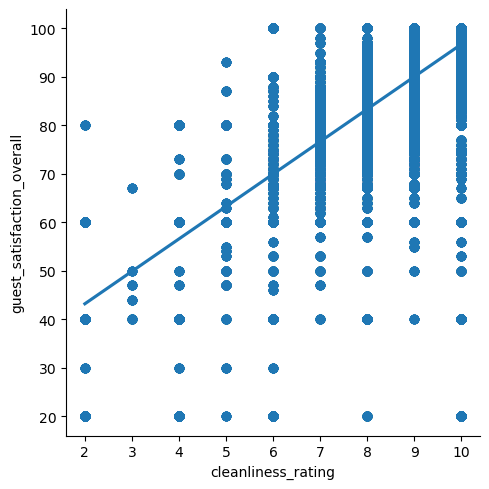

In [46]:
sns.lmplot(x='cleanliness_rating', y='guest_satisfaction_overall', data=cleaned_dataset)

(0.0, 110.0)

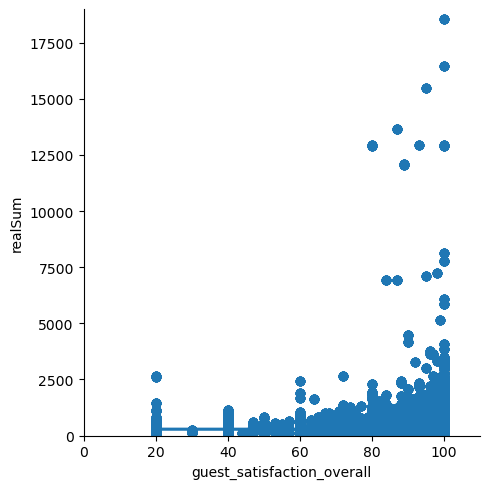

In [47]:
sns.lmplot(x='guest_satisfaction_overall', y='realSum', data=cleaned_dataset)
# Tweak axes using Matplotlib
plt.ylim(0, 19000)
plt.xlim(0, 110)

(0.0, 110.0)

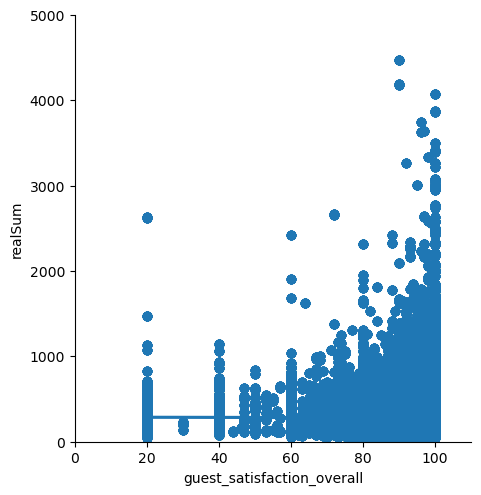

In [48]:
#We can see the majority of the points cluster in the range of 0 to 5000
sns.lmplot(x='guest_satisfaction_overall', y='realSum', data=cleaned_dataset)
# Tweak axes using Matplotlib
plt.ylim(0, 5000)
plt.xlim(0, 110)

<Axes: xlabel='realSum', ylabel='guest_satisfaction_overall'>

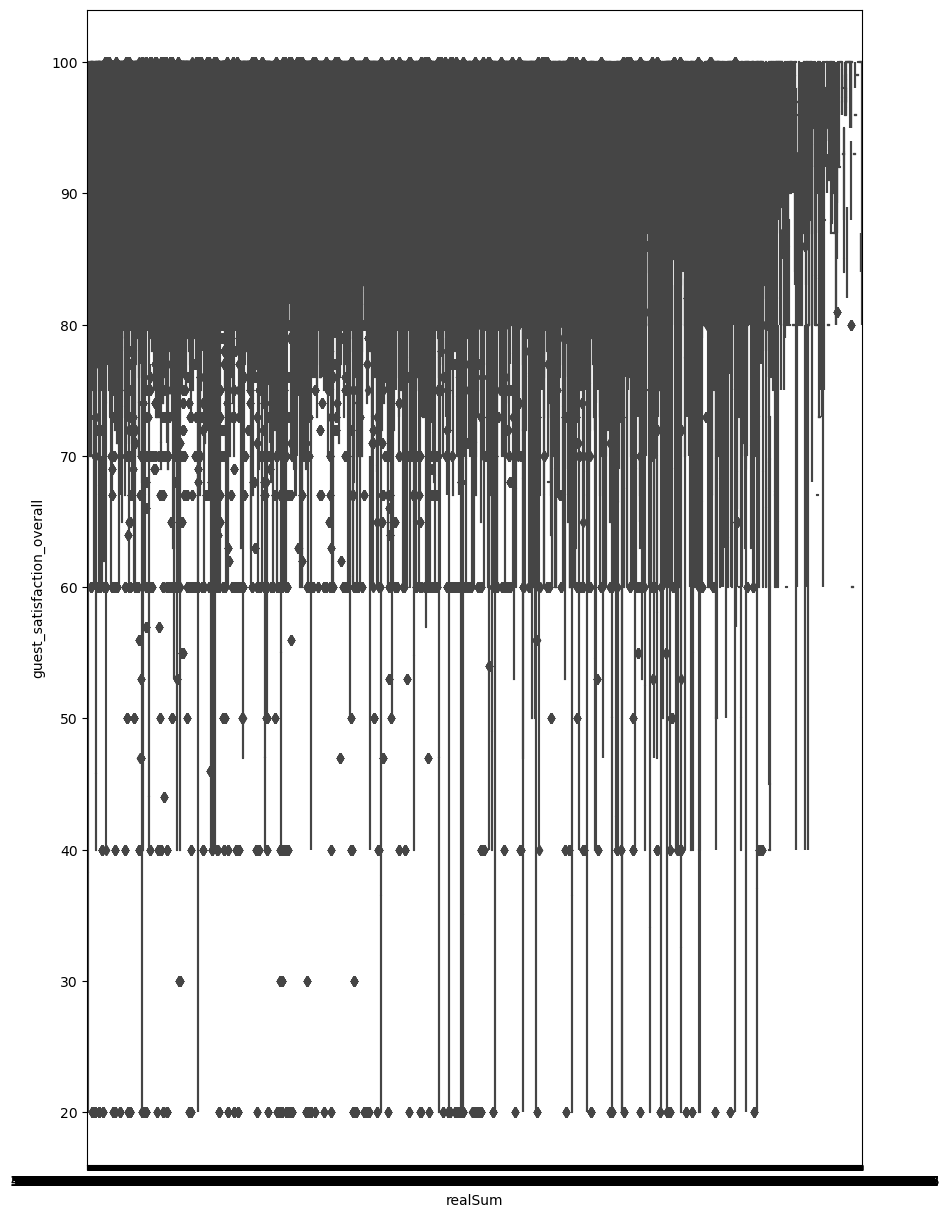

In [49]:
# plt.figure(figsize=(10, 6))

# labels = ['1', '2', '3', '4', '5']
# cleanliness_rating_count = df['cleanliness_rating'].value_counts(normalize=True) * 100
# colors = ['#581845', '#900C3F', '#C70039', '#FF5733', '#FFC300']

# plt.bar(labels, cleanliness_rating_count.values, color=colors)

# plt.title('Bar Chart Showing Distribution of Cleanliness Ratings')
# plt.xlabel('Cleanliness Rating')
# plt.ylabel('Percentage')
# plt.ylim(top=100)

# for i, v in enumerate(cleanliness_rating_count.values):
#     plt.text(i, v+2, f"{v:.1f}%", font)

plt.figure(figsize=(10, 15))
sns.boxplot(x='realSum', y='guest_satisfaction_overall', data=cleaned_dataset)

In [50]:
cleaned_dataset.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,...,Unnamed: 0.10,Unnamed: 0.9,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1
0,0,194.033698,Private room,False,True,2.0,False,10.0,93.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,344.245776,Private room,False,True,4.0,False,8.0,85.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,264.101422,Private room,False,True,2.0,False,9.0,87.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,433.529398,Private room,False,True,4.0,False,9.0,90.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,485.552926,Private room,False,True,2.0,True,10.0,98.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
#cleaned_dataset=cleaned_dataset.drop[['Unnamed', 'Unnamed:0.7', 'Unnamed:0.6', 'Unnamed:0.5', 'Unnamed:0.4', 'Unnamed:0.3', 'Unnamed:0.2', 'Unnamed:0.1']]
to_drop = ['Unnamed: 0', 'Unnamed: 0.7', 'Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'lng', 'lat', 'biz', 'multi', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm']
cleaned_dataset = (df_append.drop(to_drop, axis=1))

## Correlation of Attributes

In [52]:
cleaned_dataset.corr(method='pearson')

C:\Users\Canaan Presbyterian\AppData\Local\Temp\ipykernel_6956\383143443.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cleaned_dataset.corr(method='pearson')


,realSum,room_shared,room_private,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,Unnamed: 0.11,Unnamed: 0.10,Unnamed: 0.9,Unnamed: 0.8
realSum,1.000000,-0.035095,-0.171949,0.203077,-0.045478,-0.006082,-0.001888,0.221653,-0.044725,-0.061025,0.049110,0.048600,0.047977,0.047197
room_shared,-0.035095,1.000000,-0.063533,0.035146,-0.027839,-0.040097,-0.027876,-0.021365,0.014144,-0.002868,-0.001627,-0.001718,-0.001829,-0.001967
room_private,-0.171949,-0.063533,1.000000,-0.499993,-0.049501,-0.030983,-0.033401,-0.155889,0.213351,0.101981,0.028474,0.028052,0.027536,0.026890
person_capacity,0.203077,0.035146,-0.499993,1.000000,0.031431,0.003256,0.005181,0.560627,-0.128488,-0.037267,-0.024409,-0.024109,-0.023743,-0.023285
host_is_superhost,-0.045478,-0.027839,-0.049501,0.031431,1.000000,0.272376,0.280062,0.024250,-0.056113,-0.000722,-0.092422,-0.092009,-0.091506,-0.090876
cleanliness_rating,-0.006082,-0.040097,-0.030983,0.003256,0.272376,1.000000,0.714045,0.033489,-0.030202,0.010441,-0.056716,-0.056389,-0.055989,-0.055490
guest_satisfaction_overall,-0.001888,-0.027876,-0.033401,0.005181,0.280062,0.714045,1.000000,0.047573,-0.004178,0.029788,-0.086190,-0.085730,-0.085169,-0.084467
bedrooms,0.221653,-0.021365,-0.155889,0.560627,0.024250,0.033489,0.047573,1.000000,-0.006262,0.044431,-0.026146,-0.026375,-0.026654,-0.027004
dist,-0.044725,0.014144,0.213351,-0.128488,-0.056113,-0.030202,-0.004178,-0.006262,1.000000,0.558064,0.156135,0.155926,0.155671,0.155353
metro_dist,-0.061025,-0.002868,0.101981,-0.037267,-0.000722,0.010441,0.029788,0.044431,0.558064,1.000000,0.037278,0.036818,0.036255,0.035551


<b>correlation relationships:</b>

guest satisfaction and cleanliness rating 0.7

bedrooms and person_capacity 0.5

dist and metro_dist 0.5

guest satisfaction and superhost 0.2 

bedrooms with real sum 0.2

room_private and dist 0.2

<b>use guest satisfaction and cleanliness rating, bedrooms and person_capacity, dist and metro dist to do a bayesian network....if we have time.</b>

## Regression Model 

In [36]:
X = cleaned_dataset[['cleanliness_rating']]
y = cleaned_dataset['guest_satisfaction_overall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("R-squared value:", r2)

#optimizer = SGDRegressor(alpha=0.01, max_iter=1000)

rating = {'cleanliness_rating': 9}
rating_df = pd.DataFrame([rating])

satisfaction = model.predict(rating_df)
print(satisfaction)

Mean squared error: 38.87436107403045
R-squared value: 0.50951441521651
[90.00916242]


In [24]:
X = df[['cleanliness_rating']].values
y = df[['guest_satisfaction_overall']].values

## Plot

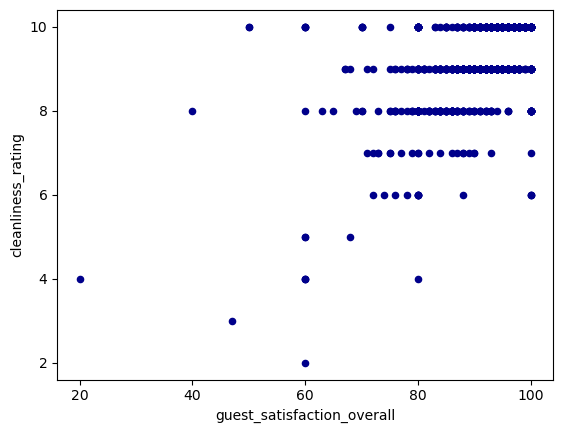

In [18]:
ax1 = df.plot.scatter(x='guest_satisfaction_overall',y='cleanliness_rating',c='DarkBlue')
plt.xticks(range(20,120,20))
plt.yticks(range(2,11,2))
plt.show()


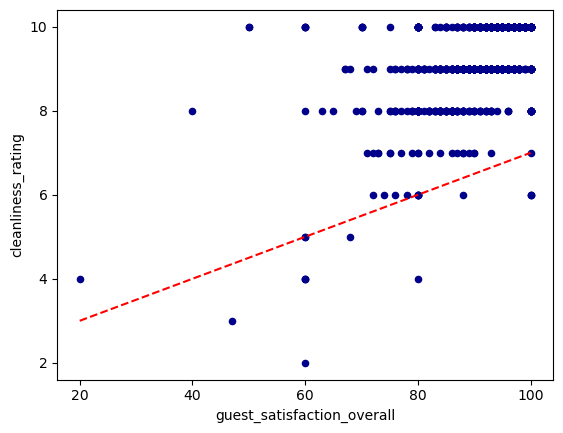

In [25]:
# create the scatter plot
ax1 = df.plot.scatter(x='guest_satisfaction_overall', y='cleanliness_rating', c='DarkBlue')

# set the x-axis and y-axis ticks
plt.xticks(range(20, 120, 20))
plt.yticks(range(2, 11, 2))

# add a line to the plot
import numpy as np
x = np.array([20, 100])
y = 2 + 0.05 * x
plt.plot(x, y, color='red', linestyle='--')

# show the plot
plt.show()

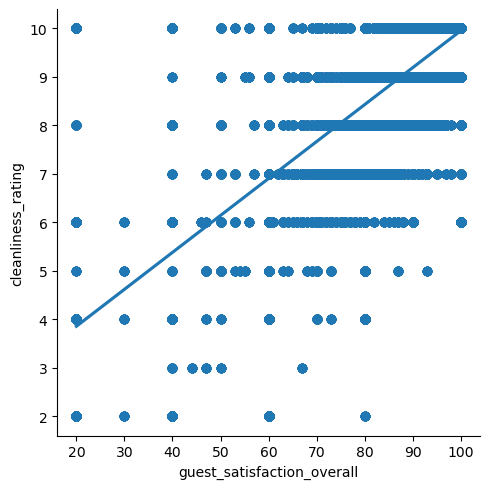

In [45]:
sns.lmplot(data=cleaned_dataset, x="guest_satisfaction_overall", y="cleanliness_rating")

## Random Forest 

it predicting something so good enough for now 

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

In [27]:
rf.fit(X_train, y_train)

C:\Users\Canaan Presbyterian\AppData\Local\Temp\ipykernel_6956\2725846524.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [28]:
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.21666666666666667
Classification Report:
              precision    recall  f1-score   support

        47.0       0.00      0.00      0.00         1
        60.0       0.67      0.67      0.67         3
        70.0       0.00      0.00      0.00         2
        71.0       0.00      0.00      0.00         1
        73.0       0.00      0.00      0.00         1
        75.0       0.00      0.00      0.00         2
        76.0       0.00      0.00      0.00         1
        77.0       0.00      0.00      0.00         1
        78.0       0.00      0.00      0.00         1
        79.0       0.00      0.00      0.00         1
        80.0       0.12      0.31      0.17        13
        81.0       0.00      0.00      0.00         3
        82.0       0.00      0.00      0.00         3
        83.0       0.00      0.00      0.00         2
        84.0       0.00      0.00      0.00         7
        85.0       0.00      0.00      0.00         6
        86.0       0.00     

c:\ProgramData\Anaconda3\envs\jade_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\jade_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\jade_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
from sklearn.model_selection import GridSearchCV
# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with best hyperparameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)

c:\ProgramData\Anaconda3\envs\jade_env\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\jade_env\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\ProgramData\Anaconda3\envs\jade_env\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\ProgramData\Anaconda3\envs\jade_env\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


C:\Users\Canaan Presbyterian\AppData\Local\Temp\ipykernel_6956\4262280462.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf.fit(X_train, y_train)


RandomForestClassifier(min_samples_leaf=2, n_estimators=200)

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)  # Assuming X_train and y_train are your training data

# Make predictions on new data
X_new = [[3]]  # Load or prepare new data for prediction
y_pred = rf.predict(X_new)  # Predict the target variable for new data

y_pred
# print(y_pred)

C:\Users\Canaan Presbyterian\AppData\Local\Temp\ipykernel_6956\1018088830.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)  # Assuming X_train and y_train are your training data


array([60.])

# Sensitivity Analysis for linear regression

In [39]:
# Define the baseline cleanliness rating
baseline_rating = 5

# Compute the baseline satisfaction prediction
rating = {'cleanliness_rating': baseline_rating}
rating_df = pd.DataFrame([rating])
baseline_satisfaction = model.predict(rating_df)

# Perturb the cleanliness rating by ±10% and compute the satisfaction prediction
# perturbations = np.linspace(-0.1, 0.1, num=21)
perturbations = np.arange(-0.1, 0.11, 0.01)
satisfaction_predictions = []
for perturbation in perturbations:
    perturbed_rating = baseline_rating * (1 + perturbation)
    rating = {'cleanliness_rating': perturbed_rating}
    rating_df = pd.DataFrame([rating])
    perturbed_satisfaction = model.predict(rating_df)
    satisfaction_predictions.append(perturbed_satisfaction)

# Compute the sensitivity metrics
delta_satisfaction = np.array(satisfaction_predictions) - baseline_satisfaction
sensitivity = delta_satisfaction / baseline_satisfaction

# Replace NaN values in sensitivity array with zeros
sensitivity = np.nan_to_num(sensitivity)

# Print the sensitivity metrics
print("Cleanliness rating sensitivity analysis results:")
for perturbation, sensitivity_metric in zip(perturbations, sensitivity):
    print(f"Perturbation: {perturbation}, Sensitivity: {sensitivity_metric}")

Cleanliness rating sensitivity analysis results:
Perturbation: -0.1, Sensitivity: [-0.05298408]
Perturbation: -0.09000000000000001, Sensitivity: [-0.04768567]
Perturbation: -0.08000000000000002, Sensitivity: [-0.04238726]
Perturbation: -0.07000000000000002, Sensitivity: [-0.03708886]
Perturbation: -0.060000000000000026, Sensitivity: [-0.03179045]
Perturbation: -0.05000000000000003, Sensitivity: [-0.02649204]
Perturbation: -0.040000000000000036, Sensitivity: [-0.02119363]
Perturbation: -0.03000000000000004, Sensitivity: [-0.01589522]
Perturbation: -0.020000000000000046, Sensitivity: [-0.01059682]
Perturbation: -0.01000000000000005, Sensitivity: [-0.00529841]
Perturbation: -5.551115123125783e-17, Sensitivity: [0.]
Perturbation: 0.00999999999999994, Sensitivity: [0.00529841]
Perturbation: 0.019999999999999934, Sensitivity: [0.01059682]
Perturbation: 0.029999999999999943, Sensitivity: [0.01589522]
Perturbation: 0.039999999999999925, Sensitivity: [0.02119363]
Perturbation: 0.049999999999999

c:\ProgramData\Anaconda3\envs\jade_env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\envs\jade_env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\envs\jade_env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\envs\jade_env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\envs\jade_env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaco

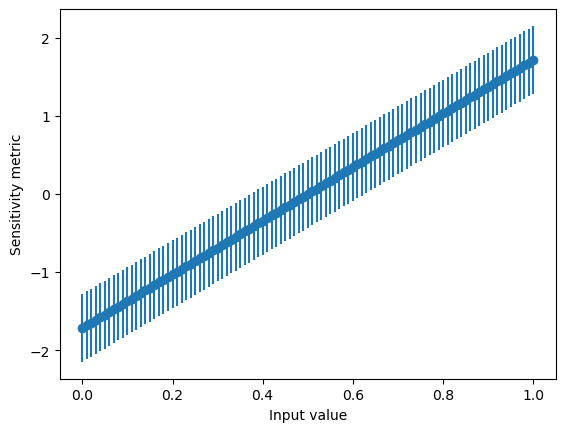

In [42]:
# Define the input range and perturbations
input_range = np.linspace(0, 1, 101)
perturbations = np.linspace(-0.2, 0.2, 11)

# Compute the sensitivity metrics for the input range of interest
x = input_range.reshape(-1, 1)
y = model.predict(x)
sensitivity = []
for p in perturbations:
    x_perturbed = x + p
    y_perturbed = model.predict(x_perturbed)
    sensitivity.append((y_perturbed - y.mean()) / y.std())

# Compute the mean and standard deviation of the sensitivity metrics
sensitivity_mean = np.mean(sensitivity, axis=0)
sensitivity_std = np.std(sensitivity, axis=0)

# Plot the sensitivity metrics as error bars
plt.errorbar(input_range, sensitivity_mean, yerr=sensitivity_std, fmt='-o')
plt.xlabel('Input value')
plt.ylabel('Sensitivity metric')
plt.show()

# Random Forest Regression

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate a random dataset for demonstration purposes
X, y = make_regression(n_samples=1000, n_features=10, noise=0.5)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the random forest regressor to the training data
rf.fit(X_train, y_train)

# Predict the output for the testing set
y_pred = rf.predict(X_test)

# Calculate the mean squared error between the predicted and actual values
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print('Mean Squared Error:', mse)

Mean Squared Error: 8209.360616603662


In [44]:
from sklearn.ensemble import RandomForestRegressor

X, y = make_regression(n_samples=10000, n_features=1, noise=0.5)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestRegressor(n_estimators=100,  random_state=42)
rf.fit(X_train, y_train)  # Assuming X_train and y_train are your training data

# Make predictions on new data
X_new = [[5]]  # Load or prepare new data for prediction
y_pred = rf.predict(X_new)  # Predict the target variable for new data

y_pred
print(y_pred)

[276.71418732]
